**Name: Arwaz Khan**

**Roll No.: 242210005**

**Date: 28/01/2025**

**Time: 11:10 AM**

# **Decision Tree Classifier**

1. Your task is to develop a model to predict whether a patient has diabetes based on specific diagnostic measurements.

**Dataset:**

The Pima Indians Diabetes Database, available on Kaggle, contains medical data for female patients of Pima Indian heritage aged 21 and above. The dataset includes the following features:
* Number of pregnancies
* Plasma glucose concentration
* Diastolic blood pressure
* Triceps skinfold thickness
* 2-Hour serum insulin
* Body mass index (BMI)
* Diabetes pedigree function
* Age

The target variable indicates whether the patient has diabetes (1) or not (0). Link(https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

**Approach:**

* Data Exploration and Preprocessing:
1. Analyze the distribution of each feature.
2. Handle missing values (if any) appropriately.
3. Perform feature scaling if required

* Model Implementation:
1. Split the dataset into training and testing sets (e.g., 80-20 split).
2. Build and train a Decision Tree model using a library like Scikit-learn.
3. Experiment with hyperparameters such as the maximum depth, minimum samples per leaf, and splitting criteria (e.g., Gini Index, Entropy).

* Performance Evaluation:
1. Evaluate the model using metrics like accuracy, precision, recall.
2. Create and visualize the Decision Tree structure using tools like Matplotlib.

**Example study:** Link(https://towardsdatascience.com/decision-tree-classifier-explained-a-visual-guide-with-code-examples-for-beginners-7c863f06a71e)

**Observational Questions:**
1. Which splitting criterion (Gini Index or Entropy) performed better for this dataset,
and why might that be the case?
2. Is there any noticeable trend between "BMI" and diabetes presence in the dataset?

In [75]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler   # for scaling
from sklearn.model_selection import train_test_split  # for splitting the data
from sklearn.tree import DecisionTreeClassifier   # for making decision tree classifiers
from sklearn.metrics import accuracy_score, precision_score, recall_score # for calculating performance metrices
from sklearn.tree import plot_tree  # for visualizing Decision tree

In [76]:
# load dataset
ds = pd.read_csv('diabetes.csv')
ds.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Data Exploration and Preprocessing:**

In [77]:
# Analyze the distribution of each feature.
ds.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [78]:
# Handle missing values by Impute missing values with the mean (not required as no missing values is present in the dataset)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    ds[col].fillna(ds[col].mean())

In [79]:
# Perform feature scaling if required.
scaler = StandardScaler()
cols_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
ds[cols_to_scale] = scaler.fit_transform(ds[cols_to_scale])

# After Scaling
ds.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


# **Model Implementation:**


In [80]:
# Split the dataset into features (X) and target (y)
X = ds.drop('Outcome', axis=1)
y = ds['Outcome']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [82]:
#Experiment with hyperparameters

# Varying max_depth
for max_depth in [1,5,10]:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with max_depth={max_depth}: {accuracy}")

# Varying min_samples_leaf
for min_samples in [1,5,10]:
    clf = DecisionTreeClassifier(min_samples_leaf = min_samples, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with min_samples_leaf={min_samples}: {accuracy}")


# Varying criterion
for criterion in ['gini', 'entropy']:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with criterion={criterion}: {accuracy}")

Accuracy with max_depth=1: 0.7402597402597403
Accuracy with max_depth=5: 0.7922077922077922
Accuracy with max_depth=10: 0.7532467532467533
Accuracy with min_samples_leaf=1: 0.7467532467532467
Accuracy with min_samples_leaf=5: 0.7467532467532467
Accuracy with min_samples_leaf=10: 0.7402597402597403
Accuracy with criterion=gini: 0.7467532467532467
Accuracy with criterion=entropy: 0.7337662337662337


## **Performance Evaluation:**


In [83]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.7337662337662337
Precision: 0.6206896551724138
Recall: 0.6545454545454545


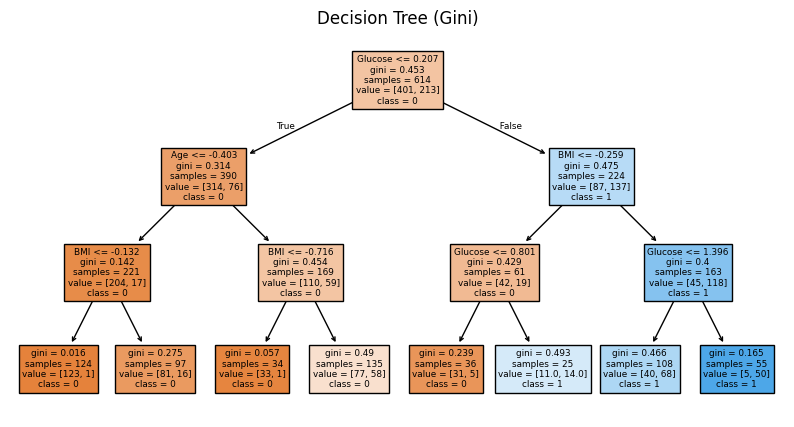

Results for criterion=gini:
Accuracy: 0.7467532467532467
Precision: 0.625
Recall: 0.7272727272727273


In [89]:
# Train a DecisionTreeClassifier with criterion='gini'
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

# Plot the Gini-based decision tree
plt.figure(figsize=(10,5))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree (Gini)")
plt.show()

# For gini
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Results for criterion=gini:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

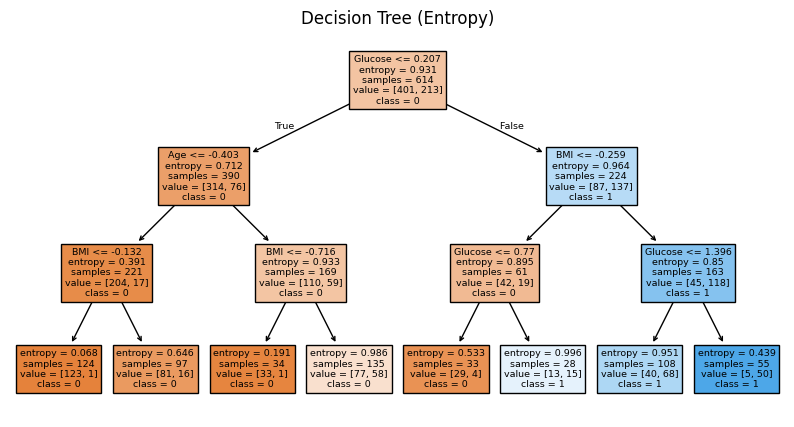

Results for criterion=entropy:
Accuracy: 0.7337662337662337
Precision: 0.6206896551724138
Recall: 0.6545454545454545


In [90]:
# Train a DecisionTreeClassifier with criterion='entropy'
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=42)
clf_entropy.fit(X_train, y_train)

# Plot the Entropy-based decision tree
plt.figure(figsize=(10,5))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree (Entropy)")
plt.show()

# For entropy
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Results for criterion=entropy:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# **Observational Questions:**

**1. Which splitting criterion (Gini Index or Entropy) performed better for this dataset, and why might that be the case?**

Accuracy with criterion = gini: 0.7467532467532467

Accuracy with criterion = entropy: 0.7337662337662337

Interpretation:
- If the accuracy with 'gini' is higher, then the Gini Index performed slightly better.  If 'entropy' has higher accuracy, then Entropy performed better. The difference might be negligible.

Why one might perform better:

- The choice between Gini and Entropy often doesn't make a huge difference in practice. They often lead to very similar tree structures.  Small variations in accuracy are usually within the noise of the data split.

- Gini is slightly faster to compute because it involves less complex calculations.

- Entropy can sometimes be more sensitive to changes in the class probabilities, potentially leading to a different tree structure, which in some datasets might lead to a slight advantage or disadvantage.

**2. Is there any noticeable trend between "BMI" and diabetes presence in the dataset?**

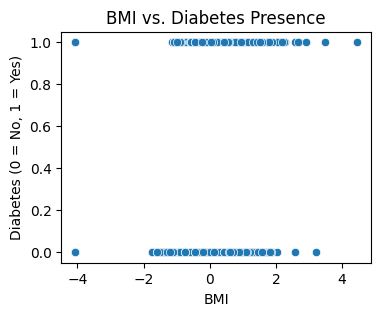

Correlation between BMI and Diabetes: 0.29269466264444477


In [86]:
# A scatter plot to visualize the relationship between BMI and diabetes
plt.figure(figsize=(4, 3))
sns.scatterplot(x='BMI', y='Outcome', data=ds)
plt.title('BMI vs. Diabetes Presence')
plt.xlabel('BMI')
plt.ylabel('Diabetes (0 = No, 1 = Yes)')
plt.show()

# Calculate the correlation coefficient
correlation = ds['BMI'].corr(ds['Outcome'])
print(f"Correlation between BMI and Diabetes: {correlation}")

- A positive correlation, even if not very strong, would suggest that higher BMI values are somewhat associated with an increased risk of diabetes.
For Example BMI = (-2, 2) have high risk of diabetes.